In [ ]:
%matplotlib inline

In [2]:
import os
import sys
import netCDF4
import numpy as np
from geophys_utils import NetCDFPointUtils

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
print(sys.version)

3.6.5 |Anaconda custom (64-bit)| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


In [3]:
def convert_value_from_old_to_new_range(input_np_array, value_to_convert, new_range_min, new_range_max):
# converts a value from a np array to a value within a desired range. Essentially it converts a number in one
# range to a number in another range, while maintaining the ratio.
    old_min = input_np_array.min()
    old_range = input_np_array.max() - old_min
    new_range = new_range_max - new_range_min

    new_value = (((value_to_convert - old_min) * new_range) / old_range) + 0

    return new_value


In [4]:
def plot_survey_points(netcdf_path, variable_to_map, colour_scheme='binary'):

    nc = netCDF4.Dataset(netcdf_path)

    netcdf_point_utils = NetCDFPointUtils(nc)

    utm_wkt, utm_coords = netcdf_point_utils.utm_coords(netcdf_point_utils.xycoords[:])

#lat = nc.variables['latitude'][:]
#lon = nc.variables['longitude'][:]
    #grav = nc.variables['Grav'][:]
    #freeair = nc.variables['Freeair'][:]
    #bouguer = nc.variables['Bouguer'][:]

    variable = nc.variables[variable_to_map][:]

    #extent = [np.min(lon) - 0.1, np.max(lon) + 0.1, np.min(lat) - 0.1, np.max(lat) + 0.1]
    #extent = [np.min(utm_coords[:,0]) - 0.1, np.max(utm_coords[:,0]) + 0.1, np.min(utm_coords[:,1]) - 0.1, np.max(utm_coords[:,1]) + 0.1]
    #print(extent)

    colour_list = []
    i = 0
    while i < len(variable):
    # need to convert the desired variable to the matplotlib input colour range (0-1) while maintaining the
    # relationship between point values
        #colour = str(convert_value_from_old_to_new_range(grav, grav[i], 0, 1))
        colour_list.append(str(convert_value_from_old_to_new_range(variable, variable[i], 0, 1)))
        i += 1

    stamen_terrain = cimgt.StamenTerrain()
    fig = plt.figure(figsize=(30,20))

    ax = fig.add_subplot(1, 1, 1, projection=ccrs.UTM(54))

    ax.set_title("It works!!!!")
    #ax.set_extent(extent)

    ax.add_image(stamen_terrain, 10)
#plt.plot(utm_coords[:,0], utm_coords[:,1], 'ro')
#plt.figure(figsize=(30,20))
#ax.plot(utm_coords[:,0], utm_coords[:,1], 'ro')
#sc = ax.scatter(utm_coords[:,0], utm_coords[:,1], marker='o', c=colour_list, s= 2, alpha=0.7, transform=ccrs.UTM(54))
# See link for possible colourmap schemes: https://matplotlib.org/examples/color/colormaps_reference.html

    cm = plt.cm.get_cmap(colour_scheme)
    sc = ax.scatter(utm_coords[:,0], utm_coords[:,1], marker='o', c=colour_list, s=4, alpha=0.9, transform=ccrs.UTM(54), cmap=cm)
    print(sc)

    cb = plt.colorbar(sc, ticks=[0, 1])
    cb.ax.set_yticklabels([str(np.min(variable)), str(np.max(variable))])  # vertically oriented colorbar

    cb.set_label("Free Air Anomaly (um/s^2)")

    transform = ccrs.UTM(54)._as_mpl_transform(ax)
    plt.show()


In [5]:
nc_path = 'http://dapds00.nci.org.au/thredds/dodsC/uc0/rr2_dev/axi547/ground_gravity/point_datasets/194701.nc'

PROJCS["UTM Zone 54, Southern Hemisphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",141],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1]]
[[ 251481.82819704 6639149.54199243]
 [ 251660.7611578  6615847.35911524]
 [ 249713.15807695 6639907.75340056]
 ...
 [ 235021.91732123 6636742.32574522]
 [ 236353.34525295 6656455.32483041]
 [ 245540.18609599 6639811.07717834]]


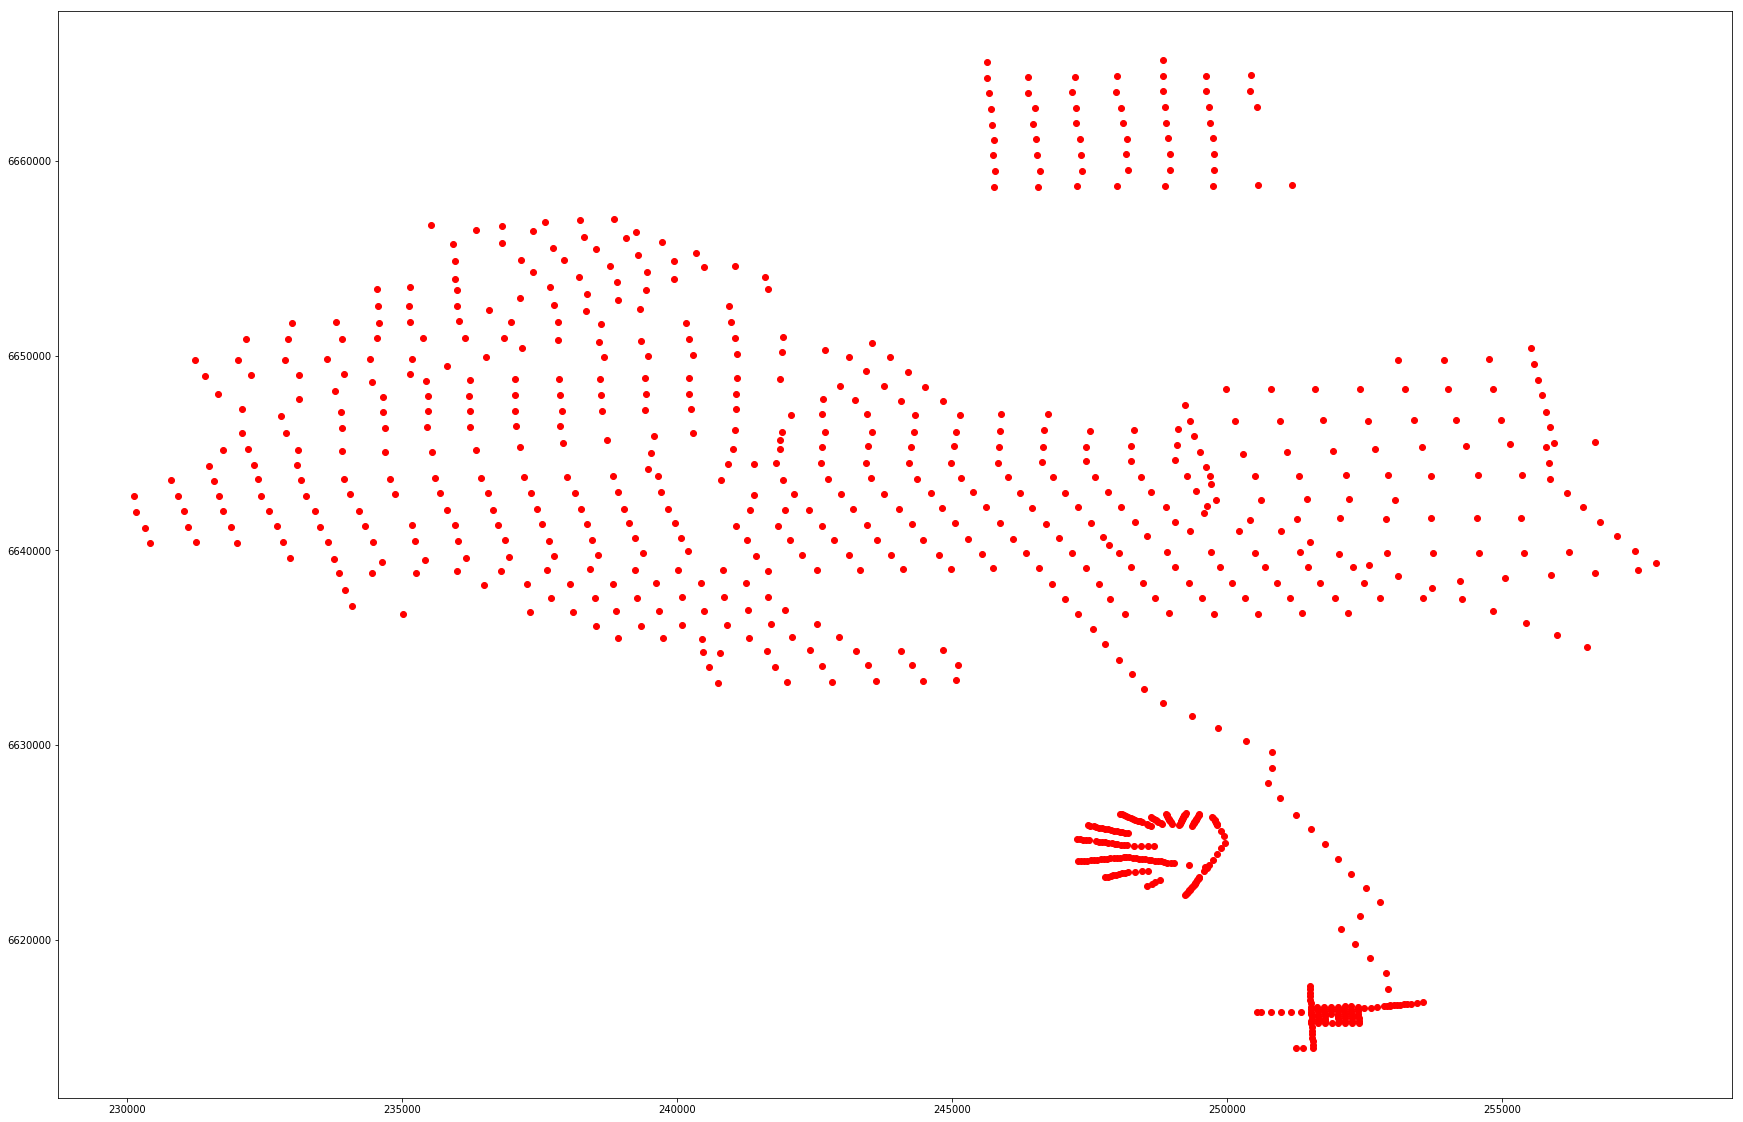

In [ ]:
plot_survey_points(nc_path, 'Freeair', 'gist_heat')